
# # Comprehensive Data Visualization with Gapminder Dataset

### Import Libraries and Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
gapminder = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv")

In [ ]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    142 non-null    object 
 1   pop        142 non-null    float64
 2   continent  142 non-null    object 
 3   lifeExp    142 non-null    float64
 4   gdpPercap  142 non-null    float64
dtypes: float64(3), object(2)
memory usage: 5.7+ KB


Line Plot - GDP Growth for Continents

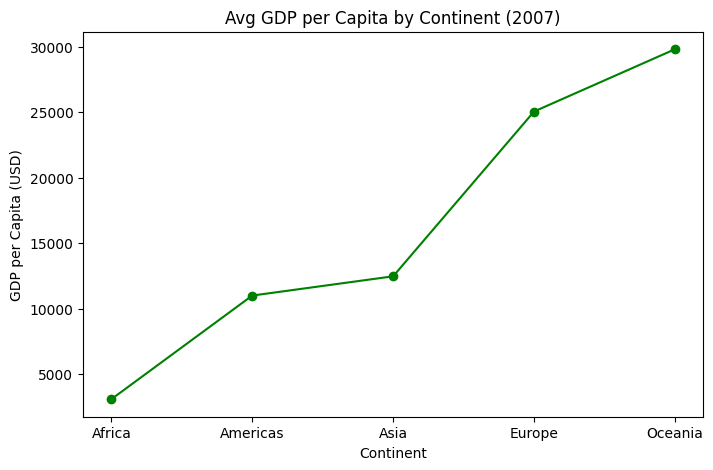

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(continent_gdp, marker='o', color='green')

plt.title('Avg GDP per Capita by Continent (2007)')
plt.xlabel('Continent')
plt.ylabel('GDP per Capita (USD)')

# Show the plot
plt.show()

Scatter Plot - GDP vs Life Expectancy

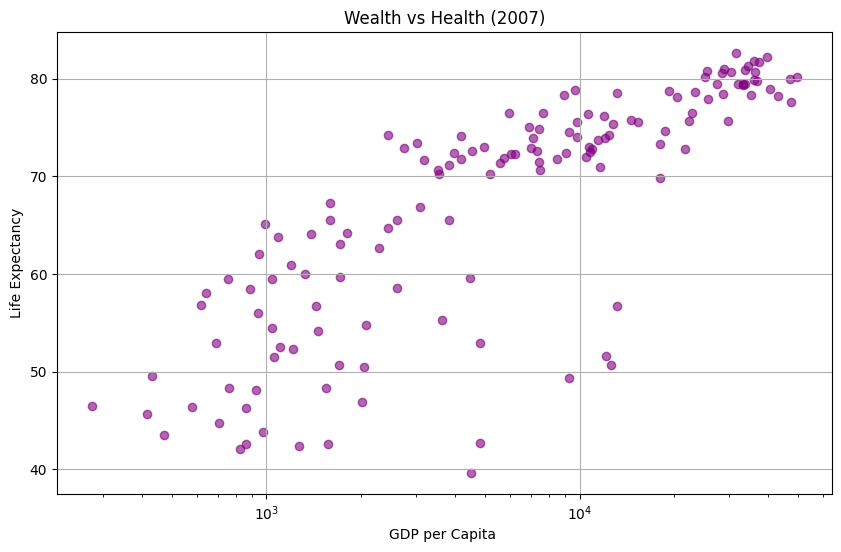

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(gapminder['gdpPercap'], gapminder['lifeExp'],
            alpha=0.6, c='purple')
plt.title('Wealth vs Health (2007)')
plt.xlabel('GDP per Capita ')
plt.ylabel('Life Expectancy')
plt.xscale('log')
plt.grid(True)
plt.show()

Histogram - Life Expectancy Distribution

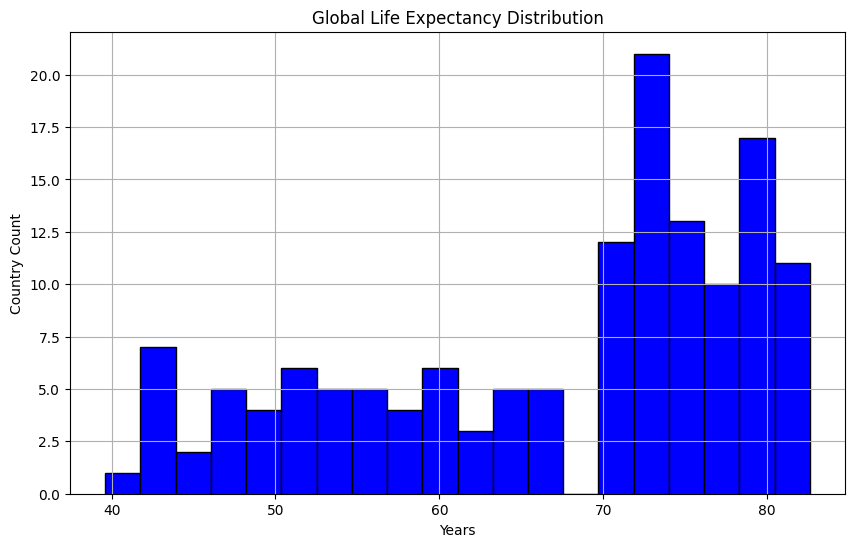

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(gapminder['lifeExp'], bins=20,
         color='blue', edgecolor='black')
plt.title('Global Life Expectancy Distribution')
plt.xlabel('Years')
plt.ylabel('Country Count')
plt.grid(True)
plt.show()

Combined Line & Scatter Plot - Population by Continent

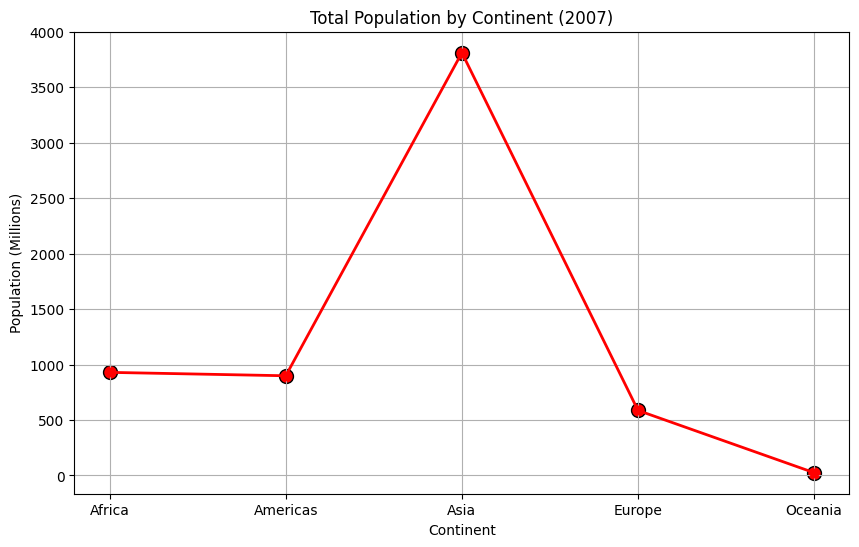

In [ ]:
plt.figure(figsize=(10,6))
continent_pop = gapminder.groupby('continent')['pop'].sum()
plt.plot(continent_pop.index, continent_pop.values/1e6,
         color='red', linewidth=2, marker='o')
plt.scatter(continent_pop.index, continent_pop.values/1e6,
            s=100, c='red', edgecolors='black')
plt.title('Total Population by Continent (2007)')
plt.xlabel('Continent')
plt.ylabel('Population (Millions)')
plt.grid(True)
plt.show()

Bar Chart - Continent Comparison (GDP per Capita)

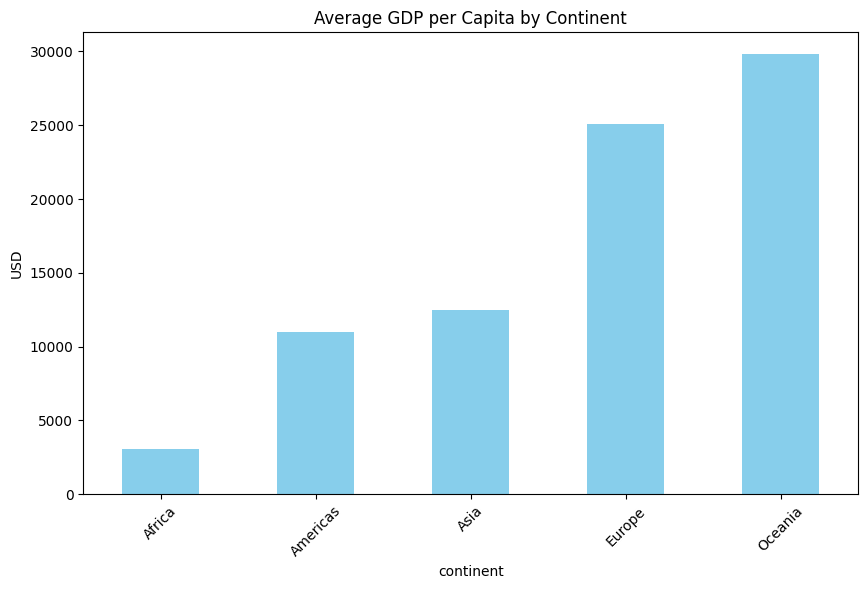

In [ ]:
plt.figure(figsize=(10,6))
continent_gdp.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average GDP per Capita by Continent')
plt.ylabel('USD')
plt.xticks(rotation=45)
plt.show()

Pie Chart - Population Distribution

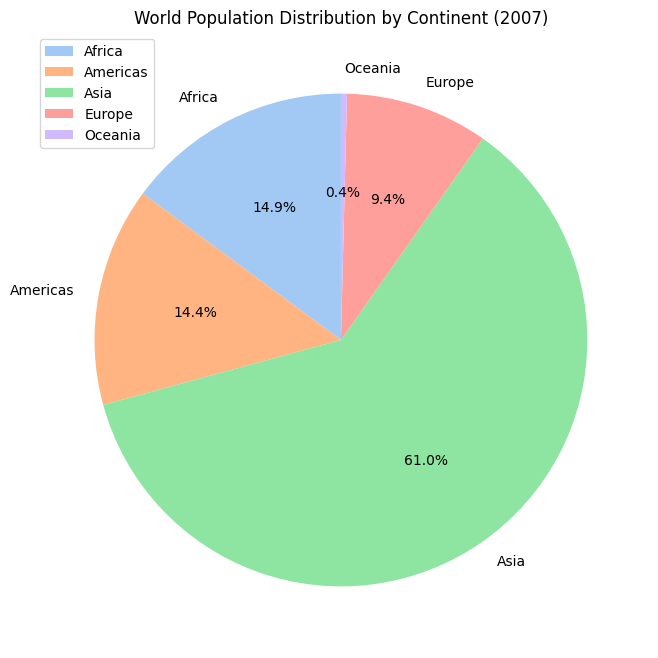

In [ ]:
continent_pop = gapminder.groupby('continent')['pop'].sum()
plt.figure(figsize=(8,8))
plt.pie(continent_pop, labels=continent_pop.index,
        autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('pastel'))
plt.title('World Population Distribution by Continent (2007)')
plt.legend(loc='upper left')
plt.show()


Horizontal Bar Chart - Top 10 Economies

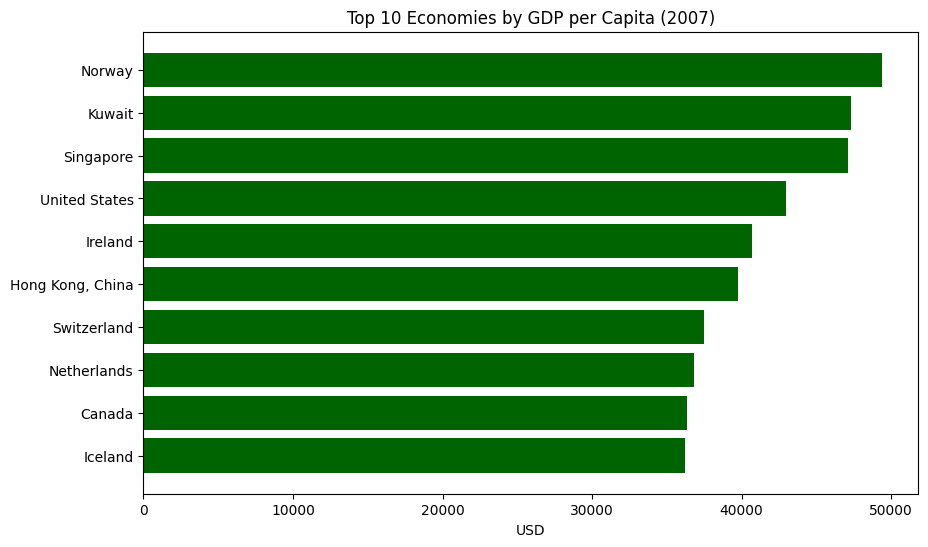

In [ ]:
top_countries = gapminder.nlargest(10, 'gdpPercap')
plt.figure(figsize=(10,6))
plt.barh(top_countries['country'], top_countries['gdpPercap'],
         color='darkgreen')
plt.title('Top 10 Economies by GDP per Capita (2007)')
plt.xlabel('USD')
plt.gca().invert_yaxis()
plt.show()

Swarm Plot - GDP Distribution

<ipython-input-25-ab7505b9d545>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='continent', y='gdpPercap', data=gapminder,


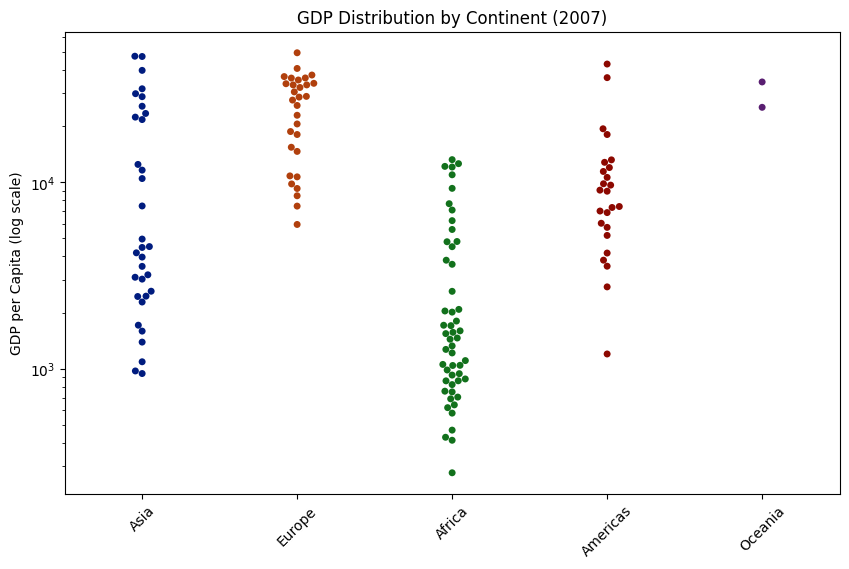

In [ ]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='continent', y='gdpPercap', data=gapminder,
              size=5, palette='dark')
plt.title('GDP Distribution by Continent (2007)')
plt.yscale('log')
plt.xlabel('')
plt.ylabel('GDP per Capita (log scale)')
plt.xticks(rotation=45)
plt.show()

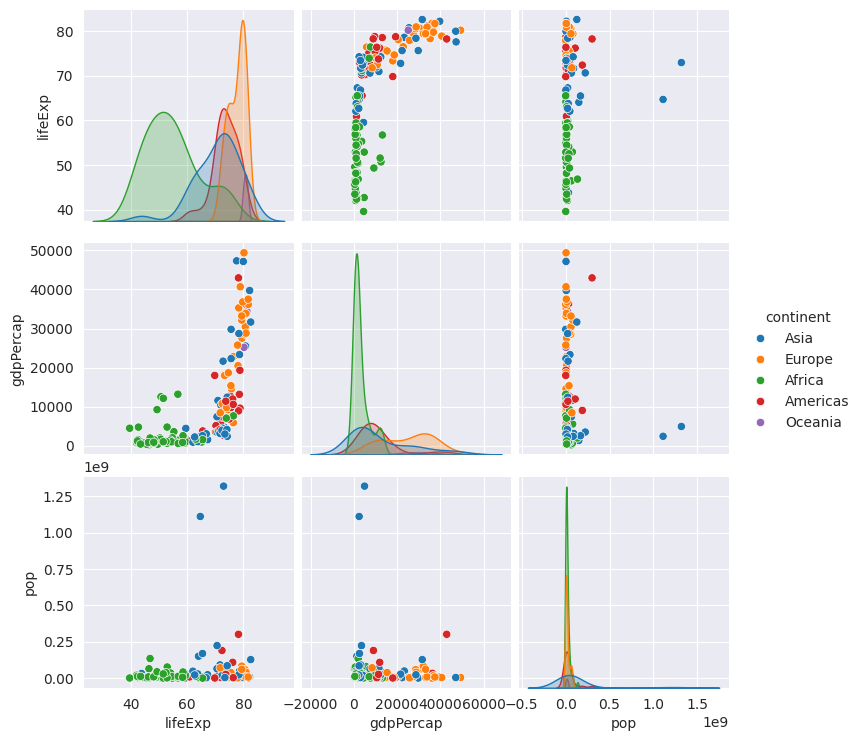

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(gapminder[['lifeExp', 'gdpPercap', 'pop', 'continent']], hue='continent')
plt.show()

# K Means


## Data Used GapMinder

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
gapminder = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv")
print("First five rows of the dataset:")
print(gapminder.head())

First five rows of the dataset:
       country         pop continent  lifeExp     gdpPercap
0  Afghanistan  31889923.0      Asia   43.828    974.580338
1      Albania   3600523.0    Europe   76.423   5937.029526
2      Algeria  33333216.0    Africa   72.301   6223.367465
3       Angola  12420476.0    Africa   42.731   4797.231267
4    Argentina  40301927.0  Americas   75.320  12779.379640


In [ ]:
features = gapminder[['pop', 'lifeExp', 'gdpPercap']]

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
kmn = KMeans(n_clusters=3, random_state=42)
kmn.fit(features_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
clusters = kmn.predict(features_scaled)
gapminder['cluster'] = clusters
print()

In [ ]:
centers_original = scaler.inverse_transform(kmn.cluster_centers_)
print("\nCluster centers (original scale):")
print(centers_original)


Cluster centers (original scale):
[[2.72354941e+07 6.23337200e+01 4.55307623e+03]
 [2.74596086e+07 7.86005750e+01 2.98962812e+04]
 [1.21453971e+09 6.88295000e+01 3.70566263e+03]]


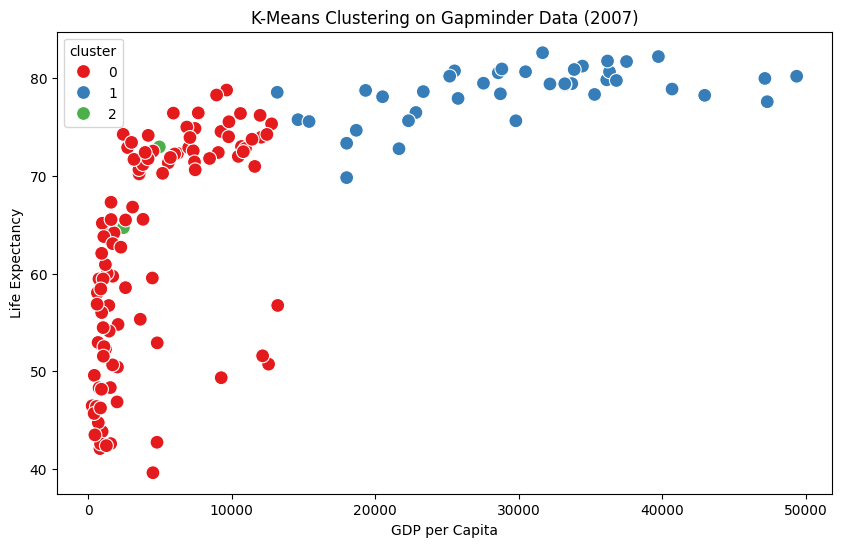

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gapminder, x='gdpPercap', y='lifeExp',
                hue='cluster', palette='Set1', s=100)
plt.title('K-Means Clustering on Gapminder Data (2007)')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.show()

Inertia values for k = 1 to 18:
[425.9999999999999, 261.0557217435351, 132.73622156144512, 55.11581822001108, 41.84528647967134, 39.2267256209458, 36.13506405458117, 26.964841641986194, 23.06834483286898, 19.24570815801395, 16.67983485766956, 15.333908017981354, 12.74982445993223, 11.853566872952479, 11.112084306107626, 9.854620550558307, 8.803558293245166, 8.274408309742817]


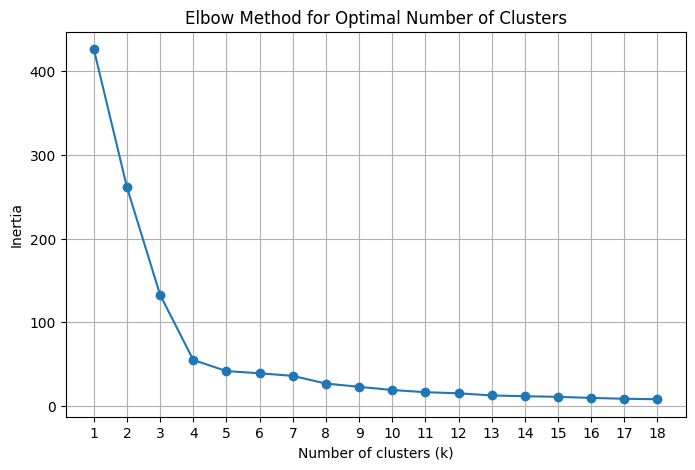

In [ ]:
#start from 1 to 18
inertia_list = []
for k in np.arange(1, 19):
    kmn = KMeans(n_clusters=k, random_state=42)
    kmn.fit(features_scaled)
    inertia_list.append(kmn.inertia_)


print("Inertia values for k = 1 to 18:")
print(inertia_list)


plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, 19), inertia_list, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.xticks(np.arange(1, 19))
plt.grid(True)
plt.show()

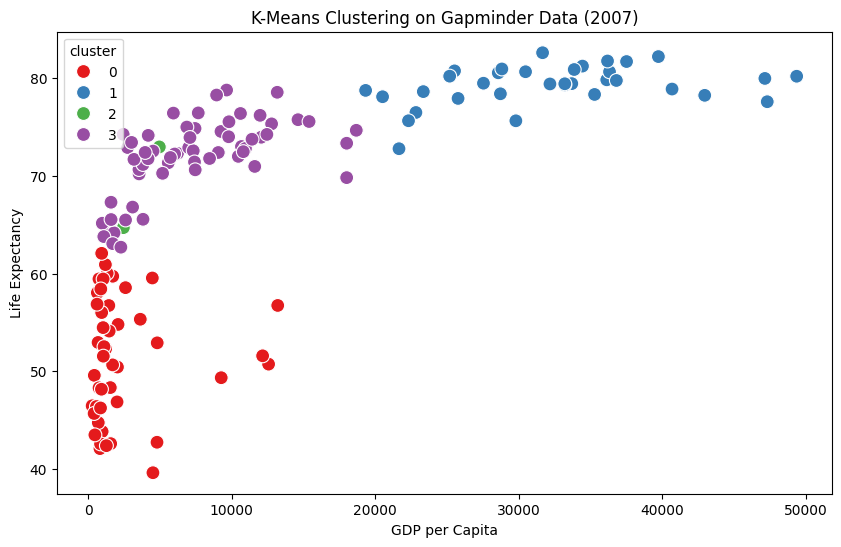

In [ ]:
kmn = KMeans(n_clusters=4, random_state=42)
kmn.fit(features_scaled)

clusters = kmn.predict(features_scaled)
gapminder['cluster'] = clusters
print()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=gapminder, x='gdpPercap', y='lifeExp',
                hue='cluster', palette='Set1', s=100)
plt.title('K-Means Clustering on Gapminder Data (2007)')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.show()

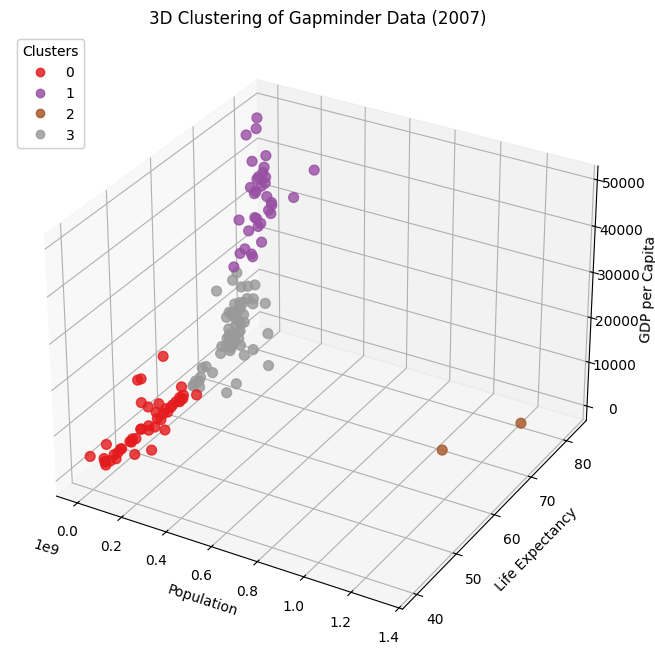

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # Import required for 3D plotting

# Create a new figure for the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using original features; adjust the order as desired
scatter = ax.scatter(
    gapminder['pop'],
    gapminder['lifeExp'],
    gapminder['gdpPercap'],
    c=gapminder['cluster'],    # Use the cluster labels for color coding
    cmap='Set1',             # Choose a colormap
    s=50,                    # Marker size
    alpha=0.8                # Transparency for better visualization
)

# Set axis labels
ax.set_xlabel('Population')
ax.set_ylabel('Life Expectancy')
ax.set_zlabel('GDP per Capita')
plt.title("3D Clustering of Gapminder Data (2007)")

# Create a legend for the clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters", loc="upper left")
ax.add_artist(legend1)

plt.show()


# KNN
KNN On Wine Data

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()

print("First five rows of the dataset:")
print(wine.DESCR)


First five rows of the dataset:
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:            

In [ ]:
X = wine.data    # Features (13 chemical properties)
y = wine.target  # Target: Wine classes (3 classes)

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the KNN classifier with 10 neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 0,
       2, 0, 2, 1, 2, 0, 1, 0, 0, 2])

In [ ]:
# Evaluate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.7407407407407407


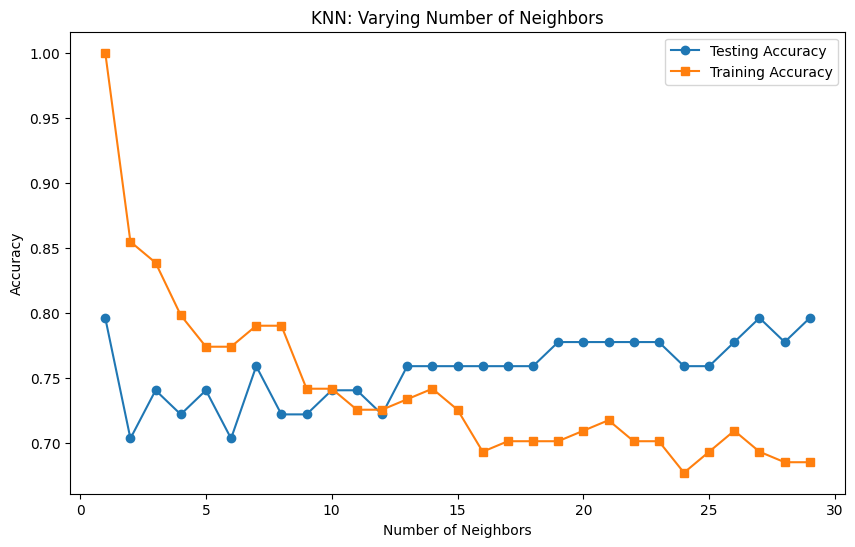

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier



neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)  # Fit the model with current k
    train_accuracy[i] = knn_model.score(X_train, y_train)
    test_accuracy[i] = knn_model.score(X_test, y_test)

plt.figure(figsize=(10, 6))
plt.plot(neighbors, test_accuracy, label='Testing Accuracy', marker='o')
plt.plot(neighbors, train_accuracy, label='Training Accuracy', marker='s')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN: Varying Number of Neighbors')
plt.show()


<Figure size 800x600 with 0 Axes>

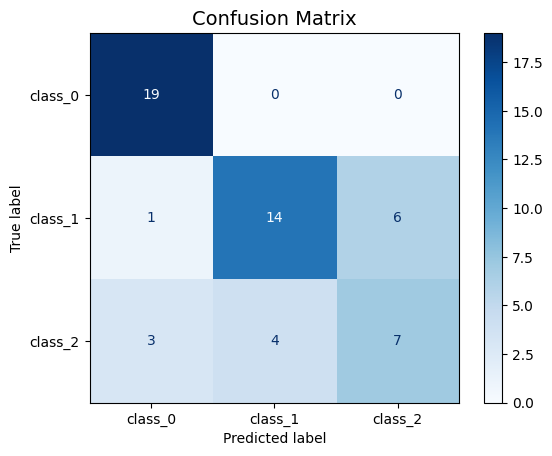

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Generate predictions
y_pred = knn.predict(X_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=wine.target_names, cmap='Blues')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create and train the Decision Tree classifier
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)
y_pred


array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

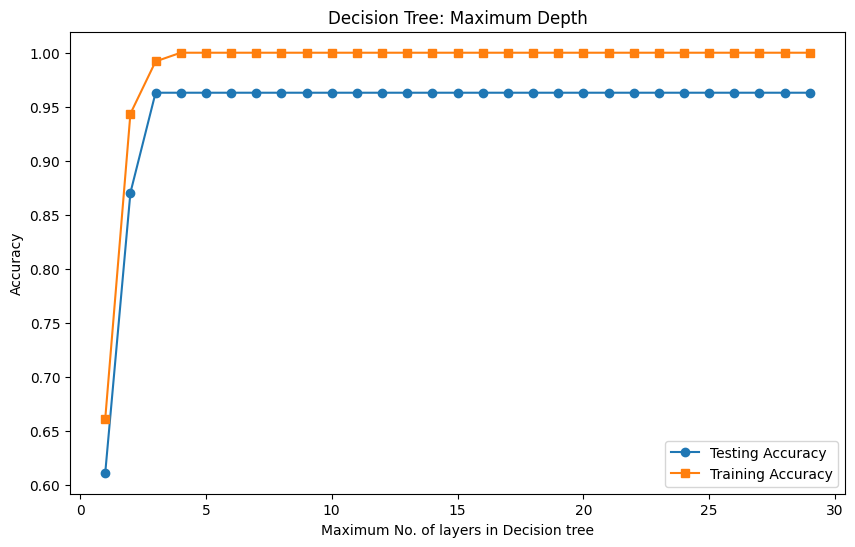

In [ ]:
depth = np.arange(1, 30)
dt_train_accuracy = np.empty(len(depth))
dt_test_accuracy = np.empty(len(depth))

for i, k in enumerate(depth):
    dt = DecisionTreeClassifier(max_depth=k, random_state=42)
    dt.fit(X_train, y_train)
    dt_train_accuracy[i] = dt.score(X_train, y_train)
    dt_test_accuracy[i] = dt.score(X_test, y_test)

plt.figure(figsize=(10, 6))
plt.plot(depth, dt_test_accuracy, label='Testing Accuracy', marker='o')
plt.plot(depth, dt_train_accuracy, label='Training Accuracy', marker='s')
plt.legend()
plt.xlabel('Maximum No. of layers in Decision tree')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Maximum Depth')
plt.show()

In [ ]:
# Evaluate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.9629629629629629


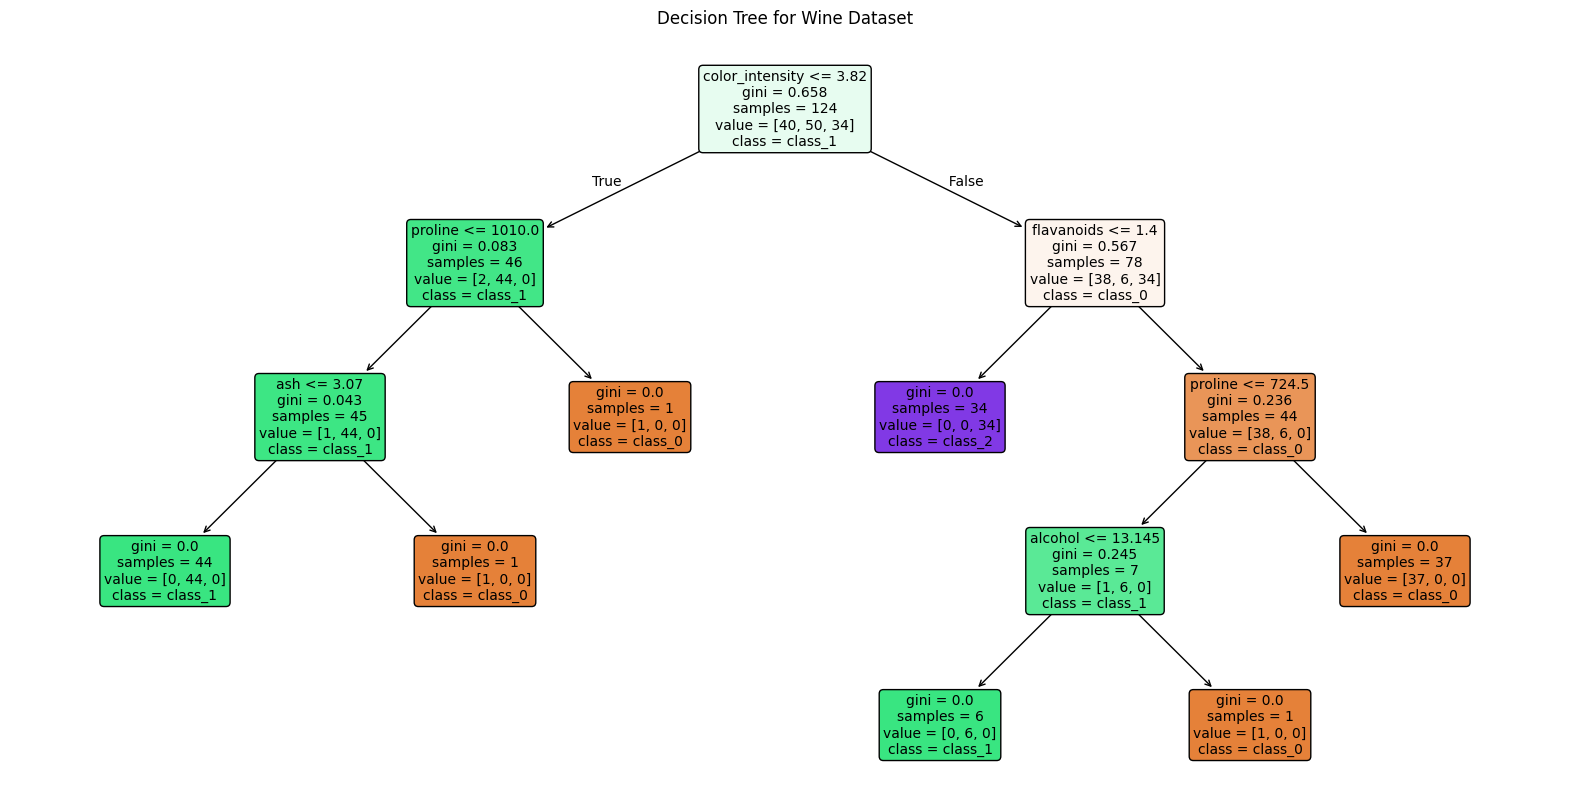

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt,
          filled=True,
          feature_names=wine.feature_names,
          class_names=wine.target_names,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Wine Dataset")
plt.show()

# Random Forest Classifier

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Gapminder 2007 dataset
gapminder = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv")
print("First five rows of the dataset:")
print(gapminder.head())

First five rows of the dataset:
       country         pop continent  lifeExp     gdpPercap
0  Afghanistan  31889923.0      Asia   43.828    974.580338
1      Albania   3600523.0    Europe   76.423   5937.029526
2      Algeria  33333216.0    Africa   72.301   6223.367465
3       Angola  12420476.0    Africa   42.731   4797.231267
4    Argentina  40301927.0  Americas   75.320  12779.379640


### Select features and target

In [ ]:
X = gapminder[['lifeExp', 'pop', 'gdpPercap']]
y = gapminder['continent']

### Encode the target variable (continent) into numerical values


In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)
y_pred

array([2, 0, 1, 2, 3, 1, 1, 2, 3, 0, 0, 0, 0, 2, 1, 3, 0, 2, 2, 0, 1, 3,
       2, 0, 3, 0, 3, 1, 0, 3, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0])

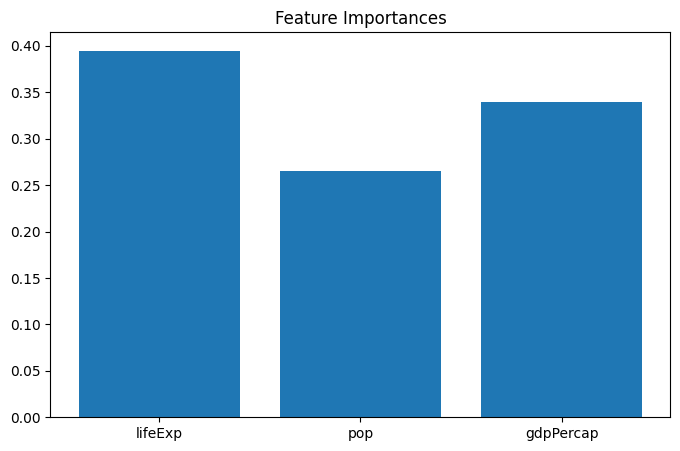

In [ ]:
impfeatures=rf.feature_importances_
import numpy as np
indices = np.argsort(impfeatures)[::-1]
impfeatures[indices]
features = X.columns # an array with the name of columns of X (Dataframe)
features[indices]
plt.figure(figsize=(8,5))
plt.bar(features,impfeatures)
plt.title('Feature Importances')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("\nTest set accuracy:", accuracy)

# Get the unique labels in y_test
unique_labels = sorted(set(y_test))

# Generate the classification report with the correct labels
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=[le.classes_[i] for i in unique_labels]))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred, labels=unique_labels))


Test set accuracy: 0.6976744186046512

Classification Report:
              precision    recall  f1-score   support

      Africa       0.88      0.83      0.86        18
    Americas       0.44      0.80      0.57         5
        Asia       0.60      0.60      0.60        10
      Europe       0.71      0.50      0.59        10

    accuracy                           0.70        43
   macro avg       0.66      0.68      0.65        43
weighted avg       0.73      0.70      0.70        43

Confusion Matrix:
[[15  3  0  0]
 [ 0  4  1  0]
 [ 2  0  6  2]
 [ 0  2  3  5]]


# Random Forest Regressor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

print(df.head())
X = df.drop(columns=['MedHouseVal'])  # Independent variables

print(X.head())
y = df['MedHouseVal']  # Dependent variable (House price)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.8

Feature Importance in Descending Order:
      Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


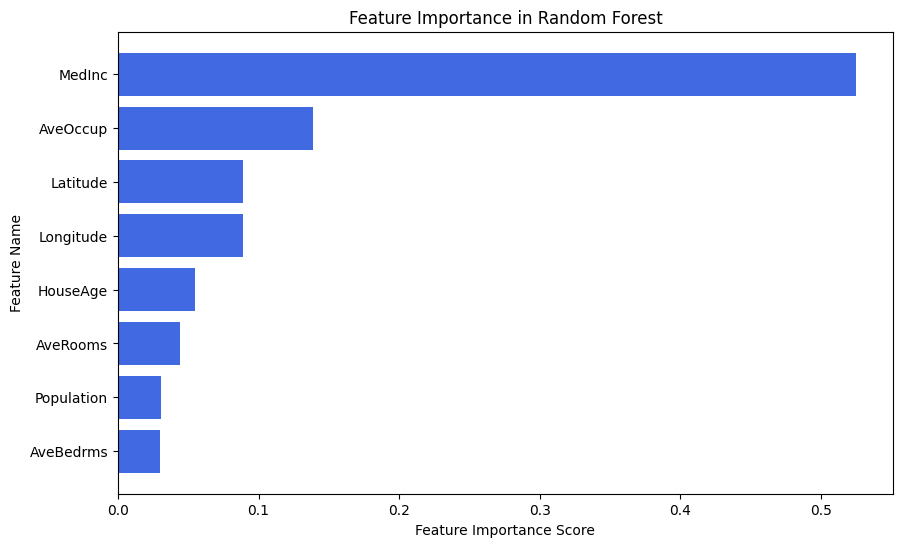

In [ ]:
feature_importance = rf_regressor.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance in Descending Order:")
print(importance_df)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()

# Deep learning
### Deep learning specifically refers to the use of neural networks with multiple hidden layers (typically more than one) to learn intricate patterns in data.

## CIFAR - 10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Number of classes: 10


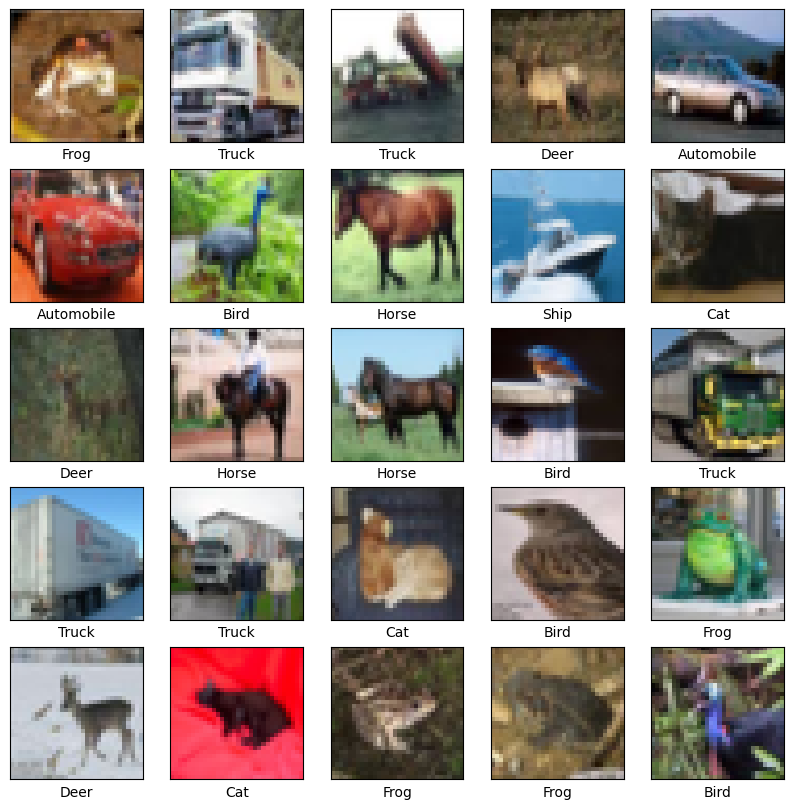

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 100ms/step - accuracy: 0.2966 - loss: 1.8752 - val_accuracy: 0.5009 - val_loss: 1.3687
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 91ms/step - accuracy: 0.5123 - loss: 1.3475 - val_accuracy: 0.5617 - val_loss: 1.2143
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.5759 - loss: 1.1833 - val_accuracy: 0.6126 - val_loss: 1.0756
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 88ms/step - accuracy: 0.6230 - loss: 1.0744 - val_accuracy: 0.6382 - val_loss: 1.0192
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.6465 - loss: 0.9967 - val_accuracy: 0.6518 - val_loss: 1.0150
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 90ms/step - accuracy: 0.6662 - loss: 0.9364 - val_accuracy: 0.6751 - val_loss: 0.9326
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.6897 - loss: 0.8651 - val_accuracy: 0.6700 - val_loss: 0.9535
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7023 - loss: 0.8254 -

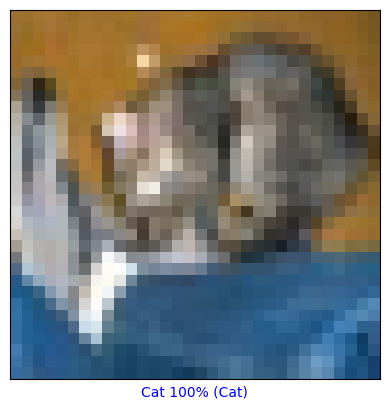

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Explore dataset structure
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Number of classes:", len(class_names))

# Visualize sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Preprocess data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build enhanced model architecture
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile model with learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model with validation split
history = model.fit(train_images, train_labels,
                    epochs=30,
                    validation_split=0.2,
                    batch_size=64)

# Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Create probability model
probability_model = models.Sequential([
    model,
    layers.Softmax()
])

# Make predictions
predictions = probability_model.predict(test_images)

# Example prediction analysis
def plot_prediction(i, predictions_array, true_label, img):
    true_label = true_label.numpy()[0] if hasattr(true_label, 'numpy') else true_label[0]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

    predicted_label = tf.argmax(predictions_array).numpy()
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*tf.reduce_max(predictions_array).numpy(),
                                         class_names[true_label]),
               color=color)

# Plot example prediction
i = 0
plt.figure()
plot_prediction(i, predictions[i], test_labels[i], test_images[i])
plt.show()

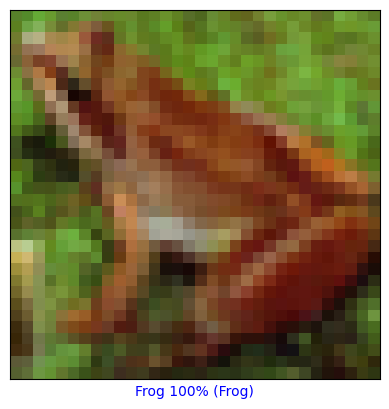

In [ ]:
# Plot example prediction
i = 29
plt.figure()
plot_prediction(i, predictions[i], test_labels[i], test_images[i])
plt.show()

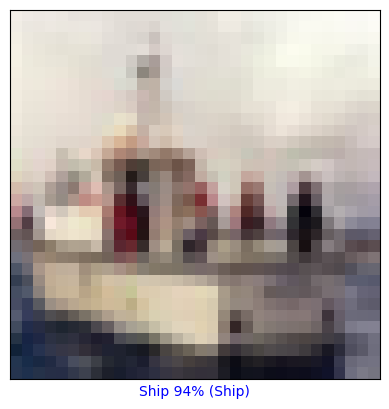

In [ ]:
# Plot example prediction
i = 88
plt.figure()
plot_prediction(i, predictions[i], test_labels[i], test_images[i])
plt.show()

##  SVHN (Street View House Numbers)
### Description: Real-world house numbers from Google Street View
Characteristics:
630,420 32x32 color images
10 classes (digits 0-9)
Challenging due to real-world distortions

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds



# Load dataset
(train_ds, test_ds), info = tfds.load(
    'svhn_cropped',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)
# Convert TF Dataset to numpy arrays
def dataset_to_numpy(ds):
    images, labels = [], []
    for image, label in tfds.as_numpy(ds):
        images.append(image)
        labels.append(label)
    return (tf.convert_to_tensor(images), tf.convert_to_tensor(labels))

train_images, train_labels = dataset_to_numpy(train_ds)
test_images, test_labels = dataset_to_numpy(test_ds)


In [ ]:
# Display dataset information
print("Dataset Info:")
print(f"Training samples: {info.splits['train'].num_examples}")
print(f"Test samples: {info.splits['test'].num_examples}")
print(f"Image shape: {info.features['image'].shape}")
print(f"Number of classes: {info.features['label'].num_classes}")

Dataset Info:
Training samples: 73257
Test samples: 26032
Image shape: (32, 32, 3)
Number of classes: 10



Sample training images:


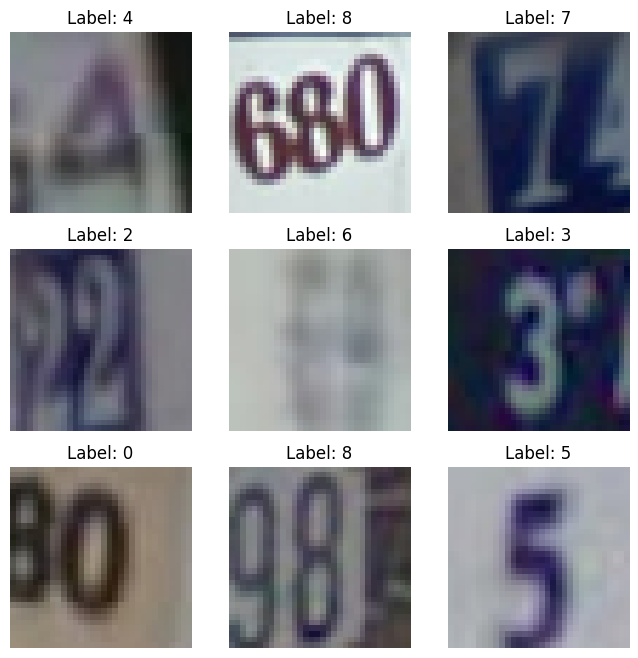


Sample image shape before preprocessing: (32, 32, 3)
Sample label: 4


In [ ]:
# Visualize sample images
import matplotlib.pyplot as plt
def plot_samples(dataset, num_samples=9):
    plt.figure(figsize=(8, 8))
    for i, (image, label) in enumerate(dataset.take(num_samples)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image.numpy())
        plt.title(f"Label: {label.numpy()}")
        plt.axis("off")
    plt.show()

print("\nSample training images:")
plot_samples(train_ds)
# Model input compatibility check
sample_image, sample_label = next(iter(train_ds))
print(f"\nSample image shape before preprocessing: {sample_image.shape}")
print(f"Sample label: {sample_label.numpy()}")

In [ ]:
# Convert images to float32 first
train_images = tf.cast(train_images, tf.float32)
test_images = tf.cast(test_images, tf.float32)

# Now normalize
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Model architecture
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model with validation split
history = model.fit(
    train_images, train_labels,
    epochs=15,
    validation_split=0.2,
    batch_size=64
)

# Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Probability model
probability_model = models.Sequential([
    model,
    layers.Softmax()
])

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


916/916 ━━━━━━━━━━━━━━━━━━━━ 79s 84ms/step - accuracy: 0.4071 - loss: 1.7050 - val_accuracy: 0.8305 - val_loss: 0.5735
Epoch 2/15
916/916 ━━━━━━━━━━━━━━━━━━━━ 87s 89ms/step - accuracy: 0.8172 - loss: 0.6121 - val_accuracy: 0.8602 - val_loss: 0.4770
Epoch 3/15
916/916 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.8460 - loss: 0.5077 - val_accuracy: 0.8739 - val_loss: 0.4356
Epoch 4/15
916/916 ━━━━━━━━━━━━━━━━━━━━ 79s 85ms/step - accuracy: 0.8589 - loss: 0.4596 - val_accuracy: 0.8847 - val_loss: 0.3951
Epoch 5/15
916/916 ━━━━━━━━━━━━━━━━━━━━ 78s 85ms/step - accuracy: 0.8706 - loss: 0.4292 - val_accuracy: 0.8814 - val_loss: 0.3959
Epoch 6/15
916/916 ━━━━━━━━━━━━━━━━━━━━ 79s 86ms/step - accuracy: 0.8755 - loss: 0.4076 - val_accuracy: 0.8846 - val_loss: 0.4046
Epoch 7/15
916/916 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.8831 - loss: 0.3784 - val_accuracy: 0.8941 - val_loss: 0.3681
Epoch 8/15
916/916 ━━━━━━━━━━━━━━━━━━━━ 85s 89ms/step - accuracy: 0.8911 - loss: 0.3573 - val_accurac

In [ ]:
# Make predictions
predictions = probability_model.predict(test_images)

814/814 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
class_names = [str(i) for i in range(10)]
# Function to visualize predictions
def plot_prediction(i, predictions_array, true_label, img):
    true_label = true_label.numpy() if hasattr(true_label, 'numpy') else true_label
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.squeeze(img), cmap=plt.cm.binary)  # Use np.squeeze to handle the image dimensions

    predicted_label = tf.argmax(predictions_array).numpy()
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * tf.reduce_max(predictions_array).numpy(),
                                         class_names[true_label]),
               color=color)

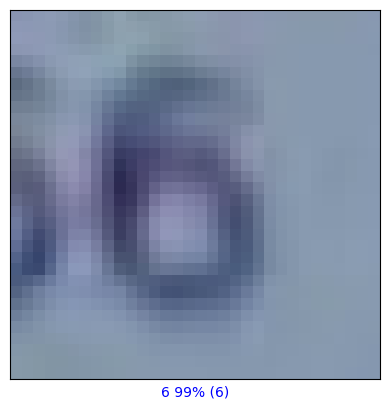

In [ ]:
# Plot an example prediction
i = 456
plt.figure()
plot_prediction(i, predictions[i], test_labels[i], test_images[i])
plt.show()

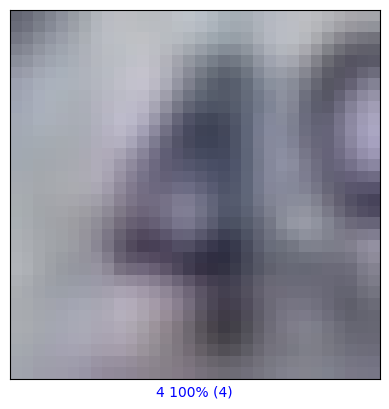

In [ ]:
# Plot an example prediction
i = 342
plt.figure()
plot_prediction(i, predictions[i], test_labels[i], test_images[i])
plt.show()

# Transformers

In [ ]:
! pip install transformers

In [ ]:
from transformers import pipeline
classifier1=pipeline("text-classification") # CREAT MODEL
result = classifier1("I love coding using ChatGpt.") # PREDIC BASED ON OUR DATA
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.995724081993103}]


In [ ]:
from transformers import pipeline
from google.colab import files

# Initialize classifier
classifier = pipeline("zero-shot-classification",
                     model="facebook/bart-large-mnli")

# Upload file from your PC
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Read uploaded file
with open(file_name, "r") as f:
    my_text = f.read()

# Optimized categories for sample text
my_categories = [
    "Economic Policy",
    "Technology Innovation",
    "Energy Transition",
    "Global Trade Dynamics",
    "Labor Market Trends",
    "Monetary Systems",
    "Geopolitical Risks",
    "ESG Factors",
    "Market Volatility",
    "Consumer Behavior"
]

# Enhanced sentence splitting (handles newlines)
sentences = [s.strip() for s in my_text.replace('\n', ' ').split('. ')]
sentences = [s for s in sentences if s and len(s) > 25]

# Classification with confidence threshold
results = []
for sentence in sentences:
    classification = classifier(
        sentence,
        candidate_labels=my_categories,
        multi_label=True,
        hypothesis_template="This text discusses {}."
    )

    # Filter results with confidence > 0.3
    filtered_labels = []
    filtered_scores = []
    for label, score in zip(classification['labels'], classification['scores']):
        if score > 0.3:
            filtered_labels.append(label)
            filtered_scores.append(score)

    results.append({
        "sentence": sentence,
        "labels": filtered_labels,
        "scores": filtered_scores
    })

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


Saving global_economic_analysis.txt to global_economic_analysis.txt


In [ ]:
# Enhanced output formatting
for i, entry in enumerate(results, 1):
    print(f"Analysis #{i}")
    print(f"Sentence: {entry['sentence']}")
    print("Key Themes:")
    for label, score in zip(entry['labels'], entry['scores']):
        print(f"  ▸ {label} ({score:.0%} confidence)")
    print("\n" + "═"*100 + "\n")


Analysis #1
Sentence: The global economy continues to navigate a complex landscape marked by divergent growth trajectories
Key Themes:
  ▸ Economic Policy (84% confidence)

════════════════════════════════════════════════════════════════════════════════════════════════════

Analysis #2
Sentence: While advanced economies grapple with persistent inflation pressures, emerging markets face currency volatility exacerbated by tightening monetary policies in developed nations
Key Themes:
  ▸ Market Volatility (99% confidence)
  ▸ Monetary Systems (96% confidence)
  ▸ Economic Policy (92% confidence)
  ▸ Consumer Behavior (32% confidence)
  ▸ ESG Factors (31% confidence)

════════════════════════════════════════════════════════════════════════════════════════════════════

Analysis #3
Sentence: The technology sector remains a key growth driver, with artificial intelligence investments surging 45% year-over-year, though concerns about ethical implications and job displacement persist
Key Themes:

## Text Clustering

In [ ]:
# 1. Import Tools
from sklearn.cluster import KMeans
from transformers import pipeline
import numpy as np

texts = [
    "The stock market is experiencing a downturn.",
    "Financial news affects stock prices significantly.",
    "Machine learning models can predict stock trends.",
    "Natural language processing is a field of AI.",
    "Artificial intelligence is transforming industries.",
    "AI and ML are revolutionizing technology."
]

embedder = pipeline("feature-extraction", model="distilbert-base-uncased")


embeddings = np.array([embedder(text)[0][0] for text in texts])


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(embeddings)


for i, cluster in enumerate(clusters):
    print(f"Text: {texts[i]} - Group: {cluster}")

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


Text: The stock market is experiencing a downturn. - Group: 2
Text: Financial news affects stock prices significantly. - Group: 2
Text: Machine learning models can predict stock trends. - Group: 0
Text: Natural language processing is a field of AI. - Group: 0
Text: Artificial intelligence is transforming industries. - Group: 1
Text: AI and ML are revolutionizing technology. - Group: 1
